In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [17]:
df = pd.read_csv("./placement-dataset.csv")
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [18]:
df.drop(columns=['city'], axis = 1, inplace=True)
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df['cgpa'] = imputer.fit_transform(df[['cgpa']])
df['iq'] = imputer.fit_transform(df[['iq']])
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [20]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,6.0,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


<Axes: xlabel='cgpa', ylabel='iq'>

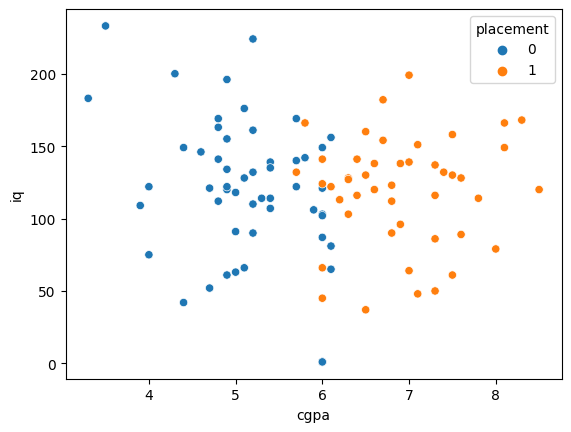

In [7]:
sns.scatterplot(x=df.cgpa, y=df.iq, hue=df.placement)

In [24]:
X= df.iloc[:,0:2]
y = df.iloc[:,-1]

In [25]:
from sklearn.linear_model import Perceptron

p = Perceptron()


In [10]:
p.fit(X,y)

Perceptron()

In [11]:
p.intercept_

array([-48.])

In [12]:
p.coef_

array([[421.9,  75. ]])

In [13]:
from mlxtend.plotting import plot_decision_regions

C:\Users\amalv\anaconda3\jupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

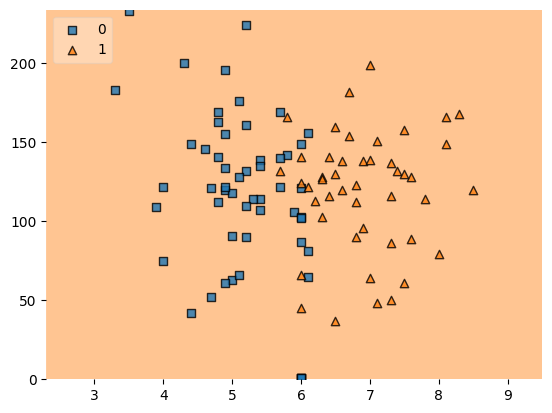

In [14]:
plot_decision_regions(x.values, y.values, clf=p, legend=2)

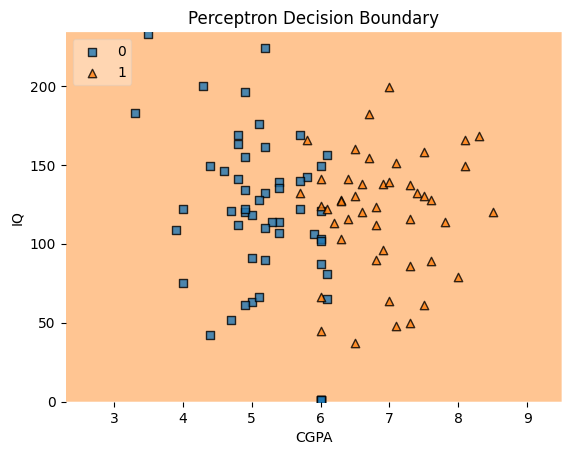

In [22]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

# Fit the Perceptron model
p = Perceptron()
p.fit(x, y)

# Plot the decision boundary
plot_decision_regions(x, y, clf=p, legend=2)

# Add labels and title
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Perceptron Decision Boundary')
plt.show()

C:\Users\amalv\anaconda3\jupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


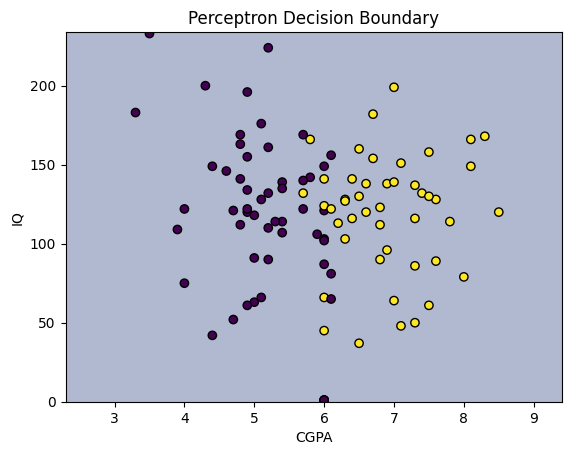

In [15]:
x_min, x_max = x['cgpa'].min() - 1, x['cgpa'].max() + 1
y_min, y_max = x['iq'].min() - 1, x['iq'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the original data points
plt.scatter(x['cgpa'], x['iq'], c=y, edgecolors='k', marker='o')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Perceptron Decision Boundary')
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Assuming x is a pandas DataFrame with 'cgpa' and 'iq' columns, and y is the target variable
x_min, x_max = x['cgpa'].min() - 1, x['cgpa'].max() + 1
y_min, y_max = x['iq'].min() - 1, x['iq'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Train a Perceptron model
p = Perceptron()
p.fit(x[['cgpa', 'iq']], y)

# Predict the class for each point in the mesh grid
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the original data points
plt.scatter(x['cgpa'], x['iq'], c=y, edgecolors='k', marker='o')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Perceptron Decision Boundary')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices